In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

sns.set_theme()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy

## 1. Carregando Base de Dados

In [ ]:
beer = pd.read_csv('cleaned.csv', sep=",")

In [ ]:
beer

,Unnamed: 0,id,name,abv,ibu,target_fg,target_og,ebc,srm,ph
0,0,163,This. Is. Lager,4.7,37,1007,1043,10.0,6.00,4.2
1,0,241,Hello My Name Is Ingrid 2016,8.2,70,1013,1076,30.0,15.20,5.2
2,0,67,Hunter Foundation Pale Ale,5.4,35,1008,1050,11.5,5.75,4.4
3,0,140,Pioneer - IPA Is Dead,7.2,100,1010,1064,12.0,6.00,4.4
4,0,139,Born To Die,8.5,85,1007,1072,15.0,7.50,4.4
5,0,218,Monk Hammer,7.2,250,1010,1065,15.0,7.50,4.4
6,0,190,Hello My Name is Sonja (w/ Evil Twin),8.3,70,1013,1076,30.0,15.00,4.4
7,0,94,Everday Anarchy,10.5,45,1005,1081,15.0,7.50,4.4
8,0,270,Blonde Export Stout,7.0,55,1020,1075,16.0,8.00,4.4
9,0,269,Small Batch: Imperial Pale Weizen,7.5,25,1010,1067,18.0,9.00,4.4


## 2. Tranformação do dataset



*   Selecionando somente os dados das variáveis quantitativas (para a análise de cluster - usando a distância euclidiana) do dataset e o nomes das cervejas





In [ ]:
beer_modificado = beer.iloc[:, 2:]



*   Tornando o nome das cervejas o índice do dataset


In [ ]:
beer_modificado.set_index('name', drop=True, inplace=True)

In [ ]:
beer_modificado

,abv,ibu,target_fg,target_og,ebc,srm,ph
name,,,,,,,
This. Is. Lager,4.7,37,1007,1043,10.0,6.00,4.2
Hello My Name Is Ingrid 2016,8.2,70,1013,1076,30.0,15.20,5.2
Hunter Foundation Pale Ale,5.4,35,1008,1050,11.5,5.75,4.4
Pioneer - IPA Is Dead,7.2,100,1010,1064,12.0,6.00,4.4
Born To Die,8.5,85,1007,1072,15.0,7.50,4.4
Monk Hammer,7.2,250,1010,1065,15.0,7.50,4.4
Hello My Name is Sonja (w/ Evil Twin),8.3,70,1013,1076,30.0,15.00,4.4
Everday Anarchy,10.5,45,1005,1081,15.0,7.50,4.4
Blonde Export Stout,7.0,55,1020,1075,16.0,8.00,4.4


## 3. Analytics dos Dados

#### 3.1 - Principais estatíticas



*   Principais elementos estatíticos através da função describe



In [ ]:
describe = beer_modificado.describe()

In [ ]:
describe

,abv,ibu,target_fg,target_og,ebc,srm,ph
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.450000,77.200000,1010.300000,1066.900000,17.250000,8.745000,4.460000
std,1.625662,65.145649,4.270051,12.133059,7.115125,3.497654,0.267499
min,4.700000,25.000000,1005.000000,1043.000000,10.000000,5.750000,4.200000
25%,7.050000,39.000000,1007.250000,1064.250000,12.750000,6.375000,4.400000
50%,7.350000,62.500000,1010.000000,1069.500000,15.000000,7.500000,4.400000
75%,8.275000,81.250000,1012.250000,1075.750000,17.500000,8.750000,4.400000
max,10.500000,250.000000,1020.000000,1081.000000,30.000000,15.200000,5.200000


In [ ]:
import statistics
import math
from scipy import stats

In [ ]:
def statistic_analytics(lista):
  m = statistics.mean(lista)
  m0 = statistics.mode(lista)
  md = statistics.median(lista)

  # Coeficiente de variação (CV)
  cv = (statistics.stdev(lista) / m)*100

  # Assimetria
  assimetria = stats.skew(lista)

  # Curtose
  curtose = stats.kurtosis(lista)

  print("CV = {:.2f}% , Assimetria = {:.2f}, Curtose = {:.2f}".format(cv, assimetria, curtose))

### 3.2 - Análise das Variáveis



#### 3.2.1 -Análise da Variável Quantitativa ABV



In [ ]:
lista_abv = beer_modificado.abv
statistic_analytics(lista_abv)

CV = 21.82% , Assimetria = 0.03, Curtose = -0.11


Conclusão Variável 1:

Usando como base o CV valor de 21%, é um CV baixo e caracteriza:
  - uma menor dispersão dos dados, 
  - dados são mais homogênios,
  - dados estão mais concentrados em torno da média.

Resumo características:
  - curva pequena assimetria positiva - curva pra direita (valor muito próximo de zero)
  - curva com distribuição achatada (curtose negativa)

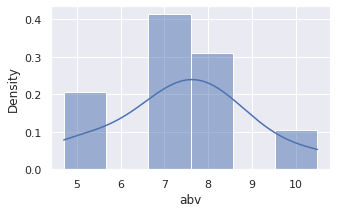

In [ ]:
#Plotando o gráfico do ABV

plt.figure(figsize=(5,3))
sns.histplot(lista_abv, stat="density", kde=True)

#### 3.2.2 -Análise da Variável Quantitativa IBU

In [ ]:
lista_ibu = beer_modificado.ibu
statistic_analytics(lista_ibu)

CV = 84.39% , Assimetria = 2.05, Curtose = 3.21


Conclusão Variável 2:

Usando como base o CV valor de 85%, é um CV alto e caracteriza:
  - uma maior dispersão dos dados, 
  - dados são menos homogênios,
  - dados estão mais expalhados.

Resumo características:
  - curva assimétrica positiva - cauda pra direita
  - maior concentração de dados á esquerda do gráfico, ou seja mais cervejas com menor ibu (em torno de 50).
  - curva com distribuição alongada (curtose positiva)

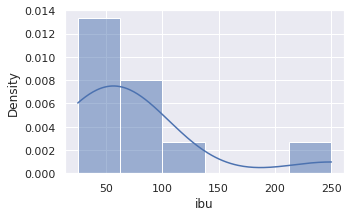

In [ ]:
#Plotando o gráfico do IBU

plt.figure(figsize=(5,3))
sns.histplot(lista_ibu, stat="density", kde=True)

#### 3.2.3 -Análise da Variável Quantitativa target_FG

In [ ]:
lista_fg = beer_modificado.target_fg
statistic_analytics(lista_fg)

CV = 0.42% , Assimetria = 1.08, Curtose = 0.72


Conclusão Variável 3:

Usando como base o CV valor de 0.42%, é um CV baixo e caracteriza:
  - uma menor dispersão dos dados, 
  - dados são mais homogênios,
  - dados estão mais próximos da média.

Resumo características:
  - curva assimétrica positiva - cauda pra direita
  - maior concentração de dados á esquerda do gráfico, ou seja mais cervejas com menor fg (em torno de 1005).
  - curva com distribuição mais próxima da média (curtose positiva próxima de zero)

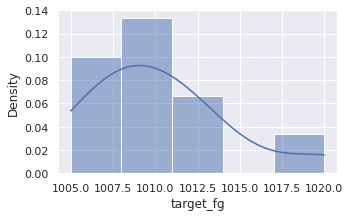

In [ ]:
#Plotando o gráfico do FG

plt.figure(figsize=(5,3))
sns.histplot(lista_fg, stat="density", kde=True)

#### 3.2.4 -Análise da Variável Quantitativa target_OG	

In [ ]:
lista_og = beer_modificado.target_og
statistic_analytics(lista_og)

CV = 1.14% , Assimetria = -0.89, Curtose = -0.34


Conclusão Variável 4:

Usando como base o CV valor de 1.14%, é um CV baixo e caracteriza:
  - uma menor dispersão dos dados, 
  - dados são mais homogênios,
  - dados estão mais próximos da média.

Resumo características:
  - curva assimétrica negativa - cauda pra esquerda
  - maior concentração de dados á direita do gráfico, ou seja mais cervejas com maior og (em torno de 1080).
  - curva com distribuição mais próxima de uma normal (curtose negativa próxima de zero)

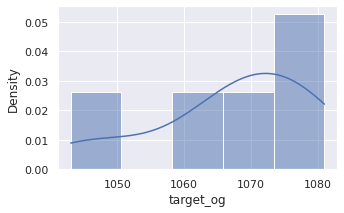

In [ ]:
#Plotando o gráfico do OG

plt.figure(figsize=(5,3))
sns.histplot(lista_og, stat="density", kde=True)

#### 3.2.5 -Análise da Variável Quantitativa EBC

In [ ]:
lista_ebc = beer_modificado.ebc
statistic_analytics(lista_ebc)

CV = 41.25% , Assimetria = 1.10, Curtose = -0.23


Conclusão Variável 5:

Usando como base o CV valor de 41%, é um CV alto e caracteriza:
  - uma maior dispersão dos dados, 
  - dados são menos homogênios,
  - dados estão mais expalhados.

Resumo características:
  - curva assimétrica positiva - cauda pra direita
  - maior concentração de dados á esquerda do gráfico, ou seja mais cervejas com menor ebc (em torno de 15).
  - curva com distribuição próxima da normal (curtose negativa próxima de zero)

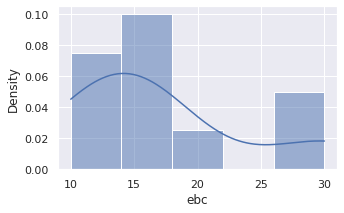

In [ ]:
#Plotando o gráfico do EBC

plt.figure(figsize=(5,3))
sns.histplot(lista_ebc, stat="density", kde=True)

#### 3.2.6 -Análise da Variável Quantitativa SRM

In [ ]:
lista_srm = beer_modificado.srm
statistic_analytics(lista_srm)

CV = 40.00% , Assimetria = 1.20, Curtose = -0.14


Conclusão Variável 6:

Usando como base o CV valor de 40%, é um CV alto e caracteriza:
  - uma maior dispersão dos dados, 
  - dados são menos homogênios,
  - dados estão mais expalhados.

Resumo características:
  - curva assimétrica positiva - cauda pra direita
  - maior concentração de dados á esquerda do gráfico, ou seja mais cervejas com menor ebc (em torno de 6).
  - curva com distribuição próxima da normal (curtose negativa próxima de zero)

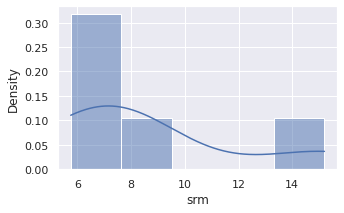

In [ ]:
#Plotando o gráfico do SRM

plt.figure(figsize=(5,3))
sns.histplot(lista_srm, stat="density", kde=True)

#### 3.2.7 -Análise da Variável Quantitativa PH

In [ ]:
lista_ph = beer_modificado.ph
statistic_analytics(lista_ph)

CV = 6.00% , Assimetria = 2.36, Curtose = 4.34


Conclusão Variável 2:

Usando como base o CV valor de 6%, é um CV baixo e caracteriza:
  - uma menor dispersão dos dados, 
  - dados são mais homogênios,
  - dados estão mais próximos da média.

Resumo características:
  - curva assimétrica positiva - cauda pra direita
  - maior concentração de dados á esquerda do gráfico, ou seja mais cervejas com menor ph (em torno de 4.4).
  - curva com distribuição alongada (curtose positiva)

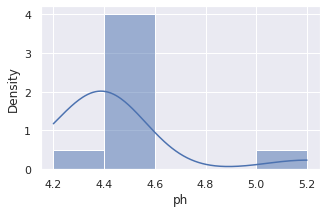

In [ ]:
#Plotando o gráfico do IBU

plt.figure(figsize=(5,3))
sns.histplot(lista_ph, stat="density", kde=True)

### 3.3 -Análise das Correlações

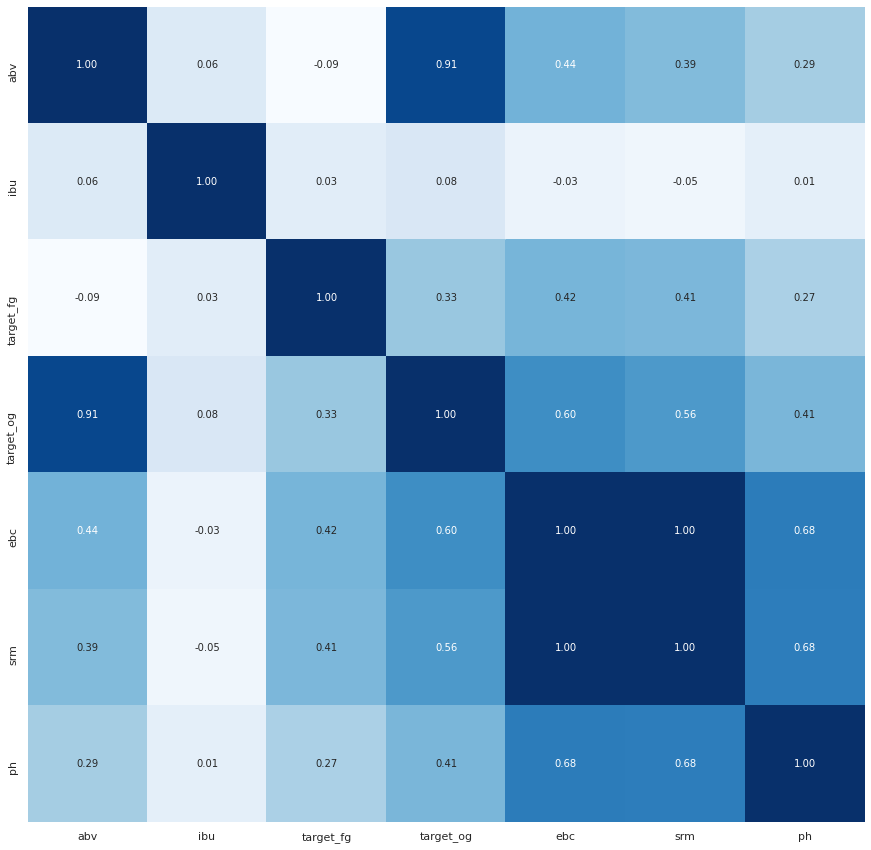

In [ ]:
plt.figure(figsize=(15,15))

corr = np.corrcoef(beer_modificado.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=beer_modificado.columns, yticklabels=beer_modificado.columns)

Conclusões:

Correlação muito forte (0.90 - 1.00):
 - srm e ebc = 1.00
 - target_og e abv = 0.91

Correlação forte (0.70 - 0.89): nenhuma

Correlação moderada (0.40 - 0.69):
 - ph e ebc = 0.68
 - ph e srm = 0.68
 - target_og e ebc = 0.60
 - target_og e srm = 0.56
 - ebc e abv = 0.44
 - target_fg e ebc = 0.42
 - target_fg e srm = 0.41
 - target_og e ph = 0.42
 

 Se tivessemos muitas variáveis, provavelmente faria escolha entre:
  - srm ou ebc
  - target_og ou abv

### 3.3 - Padronização das variáveis

Para que a análise de cluster funcione:
  - variáveis precisam ser quantitativas
  - precisam ter o mesmo peso, pois se isso não acontecer o resultado tende para a variável de maior peso.

Técnica utilizada - Z-score:
 - média zero e desvio padrão 1

In [ ]:
beer_scaled = beer_modificado.copy()

beer_scaled.iloc[:, :] = StandardScaler().fit_transform(beer_modificado)

In [ ]:
beer_scaled

,abv,ibu,target_fg,target_og,ebc,srm,ph
name,,,,,,,
This. Is. Lager,-1.783122,-0.650458,-0.814629,-2.076378,-1.074074,-0.827264,-1.024544
Hello My Name Is Ingrid 2016,0.486306,-0.116500,0.666514,0.790587,1.888889,1.945352,2.916009
Hunter Foundation Pale Ale,-1.329237,-0.682819,-0.567771,-1.468234,-0.851852,-0.902607,-0.236433
Pioneer - IPA Is Dead,-0.162102,0.368917,-0.074057,-0.251945,-0.777778,-0.827264,-0.236433
Born To Die,0.680828,0.126208,-0.814629,0.443076,-0.333333,-0.375207,-0.236433
Monk Hammer,-0.162102,2.795999,-0.074057,-0.165068,-0.333333,-0.375207,-0.236433
Hello My Name is Sonja (w/ Evil Twin),0.551147,-0.116500,0.666514,0.790587,1.888889,1.885078,-0.236433
Everday Anarchy,1.977645,-0.521014,-1.308343,1.224976,-0.333333,-0.375207,-0.236433
Blonde Export Stout,-0.291784,-0.359208,2.394514,0.703710,-0.185185,-0.224522,-0.236433


## Aprendizado Não Supervisionado - Análise de Cluster

O objetivo da Análise de Cluster é agrupar as observações de tal forma que:
- dentro de cada grupo as observações sejam semelhates (menor variância inter-grupos)
- entre si e distintas entre os grupos (maior variância intra-grupos)

Com base nas distâncias entre as variáveis, geramos a matriz de de Distância, que servirá de base para o próximo passo, que é a escolha da Técnica de Agrupamento.

**Técnicas de Agrupamento**

1. Método do Vizinho mais próximo (Single Linkage)
2. Método do Vizinho mais longe (Complete Linkage)
3. Método da Média (Average Linkage)
4. Método do Centróide (Centroid Linkage)
5. Método da Variância Mínima de Ward (Ward's Linkage)

### 1. Método do Vizinho mais próximo (Single Linkage)

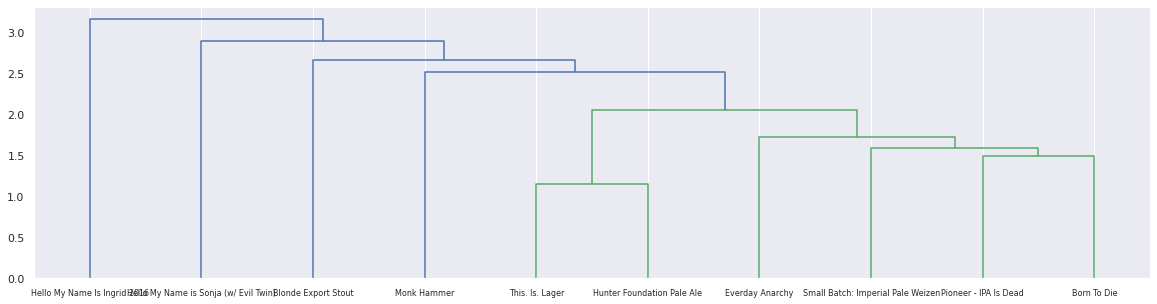

In [ ]:
Z = hierarchy.linkage(beer_scaled, 'single')

plt.figure(figsize=(20,5))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(beer_scaled.index), leaf_font_size=8)

### 2. Método do Vizinho mais longe (Complete Linkage)

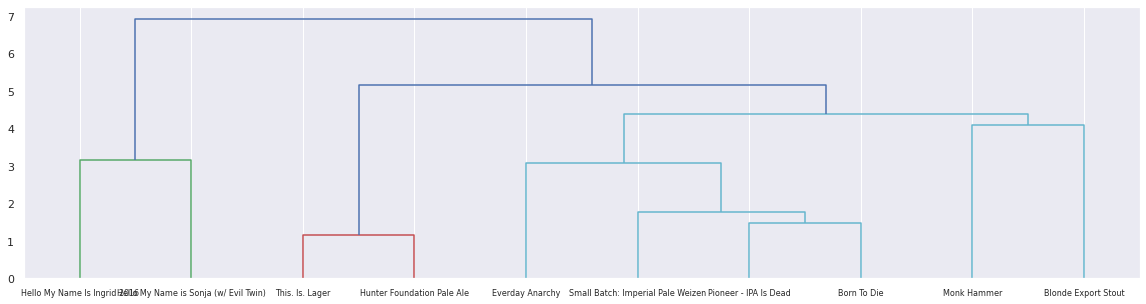

In [ ]:
Z = hierarchy.linkage(beer_scaled, 'complete')

plt.figure(figsize=(20,5))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(beer_scaled.index), leaf_font_size=8)

### 3. Método da Média (Average Linkage)

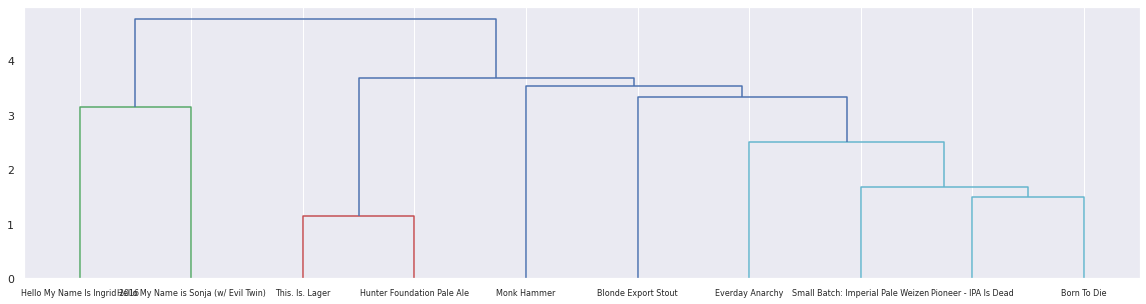

In [ ]:
Z = hierarchy.linkage(beer_scaled, 'average')

plt.figure(figsize=(20,5))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(beer_scaled.index), leaf_font_size=8)

### 4. Método do Centróide (Centroid Linkage)

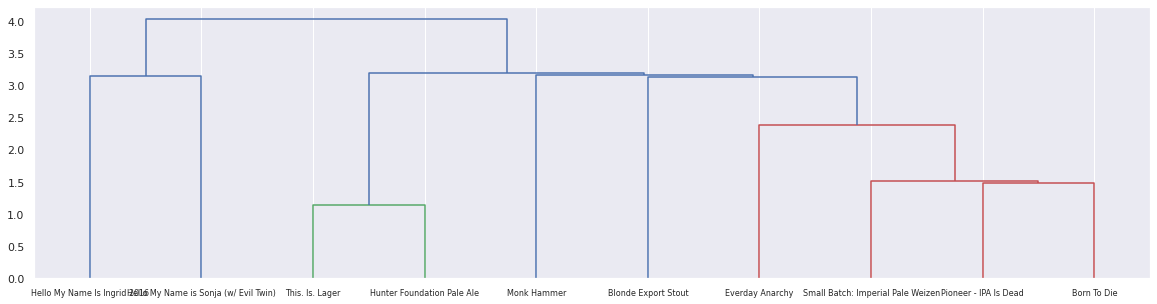

In [ ]:
Z = hierarchy.linkage(beer_scaled, 'centroid')

plt.figure(figsize=(20,5))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(beer_scaled.index), leaf_font_size=8)

### 5. Método da Variância Mínima de Ward (Ward's Linkage)

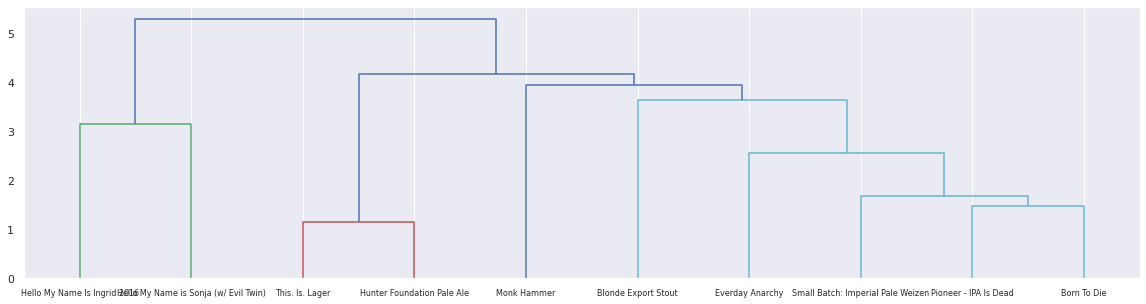

In [ ]:
Z = hierarchy.linkage(beer_scaled, 'weighted')

plt.figure(figsize=(20,5))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(beer_scaled.index), leaf_font_size=8)

## 4. Cluster Hierárquico

### 4.1 Técnica escolhida - Vizinho mais próximo

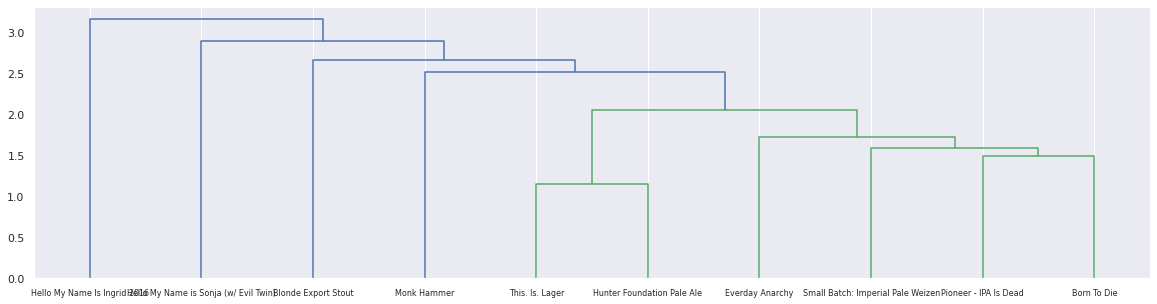

In [ ]:
Z = hierarchy.linkage(beer_scaled, 'single')

plt.figure(figsize=(20,5))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(beer_scaled.index), leaf_font_size=8)

### 4.2 - Técnica para Escolha no número de cluster

In [ ]:
n_cluster = 6
cluster = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='single')

groups = cluster.fit_predict(beer_scaled)

In [ ]:
list_beer = list(beer_scaled.index)

grouped_beers = {i: [] for i in range(n_cluster)}
for beer , group in zip(list_beer, groups):
  grouped_beers[group].append(beer)

for gp, beer in grouped_beers.items():
  print(f'Cluster {gp}: {beer}\n')


Cluster 0: ['Pioneer - IPA Is Dead', 'Born To Die', 'Everday Anarchy', 'Small Batch: Imperial Pale Weizen']

Cluster 1: ['Blonde Export Stout']

Cluster 2: ['This. Is. Lager', 'Hunter Foundation Pale Ale']

Cluster 3: ['Hello My Name Is Ingrid 2016']

Cluster 4: ['Monk Hammer']

Cluster 5: ['Hello My Name is Sonja (w/ Evil Twin)']



In [ ]:
beer_scaled['groups'] = groups

beer_scaled

,abv,ibu,target_fg,target_og,ebc,srm,ph,cluster,groups
name,,,,,,,,,
This. Is. Lager,-1.783122,-0.650458,-0.814629,-2.076378,-1.074074,-0.827264,-1.024544,3,3
Hello My Name Is Ingrid 2016,0.486306,-0.116500,0.666514,0.790587,1.888889,1.945352,2.916009,2,2
Hunter Foundation Pale Ale,-1.329237,-0.682819,-0.567771,-1.468234,-0.851852,-0.902607,-0.236433,3,3
Pioneer - IPA Is Dead,-0.162102,0.368917,-0.074057,-0.251945,-0.777778,-0.827264,-0.236433,1,1
Born To Die,0.680828,0.126208,-0.814629,0.443076,-0.333333,-0.375207,-0.236433,1,1
Monk Hammer,-0.162102,2.795999,-0.074057,-0.165068,-0.333333,-0.375207,-0.236433,4,4
Hello My Name is Sonja (w/ Evil Twin),0.551147,-0.116500,0.666514,0.790587,1.888889,1.885078,-0.236433,5,5
Everday Anarchy,1.977645,-0.521014,-1.308343,1.224976,-0.333333,-0.375207,-0.236433,1,1
Blonde Export Stout,-0.291784,-0.359208,2.394514,0.703710,-0.185185,-0.224522,-0.236433,0,0


#### 4.2.1 - Coeficiente R²

Conceito de variabilidade dos dados

In [ ]:
describe

,abv,ibu,target_fg,target_og,ebc,srm,ph
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.450000,77.200000,1010.300000,1066.900000,17.250000,8.745000,4.460000
std,1.625662,65.145649,4.270051,12.133059,7.115125,3.497654,0.267499
min,4.700000,25.000000,1005.000000,1043.000000,10.000000,5.750000,4.200000
25%,7.050000,39.000000,1007.250000,1064.250000,12.750000,6.375000,4.400000
50%,7.350000,62.500000,1010.000000,1069.500000,15.000000,7.500000,4.400000
75%,8.275000,81.250000,1012.250000,1075.750000,17.500000,8.750000,4.400000
max,10.500000,250.000000,1020.000000,1081.000000,30.000000,15.200000,5.200000


##### 4.2.1.1 - Cálculo das médias individuais

In [ ]:
mean_abv = describe.abv['mean']
mean_ibu = describe.ibu['mean']
mean_target_fg = describe.target_fg['mean']
mean_target_og = describe.target_og['mean']
mean_ebc = describe.ebc['mean']
mean_srm = describe.srm['mean']
mean_ph = describe.ph['mean']

In [ ]:
import math

In [ ]:
def variance_sums(df):
  var = []
  vars = beer_modificado.columns

  for j in vars:
    for i in range(0, len(df)):
      variance = math.pow((df[j][i] - describe.abv['mean']), 2)
      var.append(variance)

  return sum(var)

##### 4.2.1.2 - Soma de Quadrados Total (SSTc)

In [ ]:
sst = variance_sums(beer_scaled)

sst

3955.175

##### 4.2.1.3 - Soma de Quadrados Total Intragrupos (SSR)

##### 4.2.1.4 - Soma de Quadrados Total Intergrupos (SSB)


In [ ]:
list_groups = groups.to_list()

In [ ]:
groups_sum = []

for i in groups:
  if list_groups.count(i) == 1:
    continue
  else:
    group = beer_scaled.loc[beer_scaled.groups == i]
    groups_sum.append(variance_sums(group))

sum(groups_sum)

8455.489650635569

#### 4.2.2 - CCC (Cubic Clustering Criterion)

#### 4.2.3 - Método Elbow

#### 4.2.4 - Método da Silhueta

## 5. Cluster não-hierárquico

Text(0, 0.5, 'Inertia')

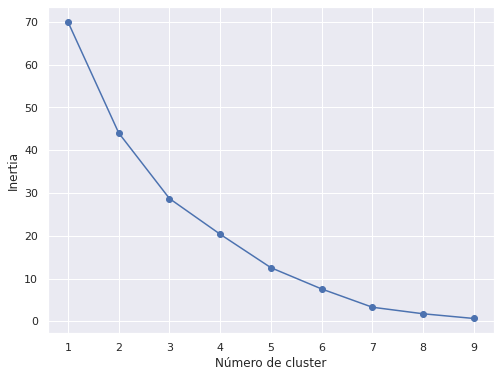

In [ ]:
inertias = []

for k in np.arange(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(beer_scaled)
  inertias.append(kmeans.inertia_)


#Plotando o gráfico do Elbow Method
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,10), inertias, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Inertia')

In [ ]:
n_clusters = 6
kmeans = KMeans(n_clusters = n_cluster)
beer_scaled['cluster'] = kmeans.fit_predict(beer_scaled)

In [ ]:
beer_scaled

,abv,ibu,target_fg,target_og,ebc,srm,ph,cluster
name,,,,,,,,
This. Is. Lager,-1.783122,-0.650458,-0.814629,-2.076378,-1.074074,-0.827264,-1.024544,3
Hello My Name Is Ingrid 2016,0.486306,-0.116500,0.666514,0.790587,1.888889,1.945352,2.916009,2
Hunter Foundation Pale Ale,-1.329237,-0.682819,-0.567771,-1.468234,-0.851852,-0.902607,-0.236433,3
Pioneer - IPA Is Dead,-0.162102,0.368917,-0.074057,-0.251945,-0.777778,-0.827264,-0.236433,1
Born To Die,0.680828,0.126208,-0.814629,0.443076,-0.333333,-0.375207,-0.236433,1
Monk Hammer,-0.162102,2.795999,-0.074057,-0.165068,-0.333333,-0.375207,-0.236433,4
Hello My Name is Sonja (w/ Evil Twin),0.551147,-0.116500,0.666514,0.790587,1.888889,1.885078,-0.236433,5
Everday Anarchy,1.977645,-0.521014,-1.308343,1.224976,-0.333333,-0.375207,-0.236433,1
Blonde Export Stout,-0.291784,-0.359208,2.394514,0.703710,-0.185185,-0.224522,-0.236433,0


In [ ]:
list_beer = list(beer_scaled.index)
groups = beer_scaled['cluster']

grouped_beers = {i: [] for i in range(n_cluster)}
for beer , group in zip(list_beer, groups):
  grouped_beers[group].append(beer)

for gp, beer in grouped_beers.items():
  print(f'Cluster {gp}: {beer}\n')


Cluster 0: ['Blonde Export Stout']

Cluster 1: ['Pioneer - IPA Is Dead', 'Born To Die', 'Everday Anarchy', 'Small Batch: Imperial Pale Weizen']

Cluster 2: ['Hello My Name Is Ingrid 2016']

Cluster 3: ['This. Is. Lager', 'Hunter Foundation Pale Ale']

Cluster 4: ['Monk Hammer']

Cluster 5: ['Hello My Name is Sonja (w/ Evil Twin)']

